In [43]:
import pandas as pd
import re
df_posts=pd.read_csv('posts.csv',encoding = 'cp1252')
s_post=df_posts['post']
s_post=s_post[s_post.notnull()]

brand_model=pd.read_csv('brand_model.csv')
s_brand=brand_model['brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace('.','').replace(',','').replace('-',' '))
s_model=brand_model['model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace('?',''))

In [44]:
import re
s_post_converted=s_post.map(lambda x:x.lower())

for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [47]:
brands=s_brand.unique()
brands

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai kia', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 'mercedes benz',
       'mercury', 'mitsubishi', 'nissan', 'pontiac', 'problem', 'saturn',
       'seat', 'sedan', 'subaru', 'suzuki', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [48]:
brands_edited=['acura', 'audi', 'bmw', 'buick', 'cadillac',  'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 
       'mercury', 'mitsubishi', 'nissan', 'pontiac',  'saturn', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo']

In [49]:
def brand_in_it(brand,post):
    if brand in post:
        return 1
    else: 
        return 0
temp={'post': s_post_converted}
for brand in brands_edited:
    temp[brand]=s_post_converted.map(lambda x:brand_in_it(brand,x))

In [50]:
df2=pd.DataFrame(temp)
s_A=df2.drop('post',axis=1).sum() #A/#B

In [51]:
s_A.sort_values(ascending=False).head(10)

bmw           796
toyota        716
audi          586
honda         345
acura         324
infiniti      177
volkswagen    164
chrysler      152
nissan        150
ford          141
dtype: int64

In [52]:
def brandAB_in_it(brandA,brandB,post):
    if brandA in post and brandB in post:
        return 1
    else: 
        return 0
temp2={'post': s_post_converted}
for brandA in brands_edited:
    for brandB in brands_edited:
        temp2[brandA+', '+brandB]=s_post_converted.map(lambda x:brandAB_in_it(brandA,brandB,x))

In [53]:
df3=pd.DataFrame(temp2)
df4=df3.drop('post',axis=1)

In [56]:
m_AB=df4.sum().values.reshape([26,26])
df_AB=pd.DataFrame(m_AB)
df_AB.columns=brands_edited
df_AB=df_AB.set_index(pd.Series(brands_edited))
df_AB

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,324,64,63,8,12,6,49,3,10,89,...,1,1,14,4,3,6,0,47,10,11
audi,64,586,138,6,23,4,23,11,18,48,...,0,0,26,5,0,11,0,99,55,15
bmw,63,138,796,6,27,12,10,11,32,65,...,2,0,33,9,0,9,0,134,18,17
buick,8,6,6,45,9,8,3,3,5,6,...,2,0,2,2,0,1,0,14,1,4
cadillac,12,23,27,9,118,7,5,3,9,10,...,0,1,2,1,0,3,0,29,4,6
chevrolet,6,4,12,8,7,87,7,7,9,9,...,0,0,8,3,0,5,0,24,4,2
chrysler,49,23,10,3,5,7,152,6,9,42,...,0,0,1,2,1,1,0,35,3,5
dodge,3,11,11,3,3,7,6,99,6,5,...,0,0,2,0,1,3,0,16,1,3
ford,10,18,32,5,9,9,9,6,141,24,...,1,0,5,2,0,7,0,42,20,4
honda,89,48,65,6,10,9,42,5,24,345,...,1,0,31,4,1,10,0,93,24,4


In [57]:
N=len(s_post)
df_lift=df_AB.copy()
for i in range(26):
    for j in range(26):
        df_lift.iloc[i,j]=N*df_AB.iloc[i,j]/(s_A[i]*s_A[j])
df_lift

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,15.419753,1.684069,1.220408,2.741289,1.568110,1.063431,4.970841,0.467265,1.093600,3.977849,...,3.854938,3.854938,1.439177,1.468548,5.782407,1.250250,0.0,1.012190,0.940229,2.494372
audi,1.684069,8.525597,1.478056,1.136746,1.661769,0.391981,1.290057,0.947289,1.088374,1.186170,...,0.000000,0.000000,1.477770,1.014952,0.000000,1.267319,0.0,1.178819,2.859194,1.880646
bmw,1.220408,1.478056,6.276382,0.836851,1.436121,0.865708,0.412920,0.697376,1.424427,1.182507,...,3.138191,0.000000,1.380804,1.344939,0.000000,0.763344,0.0,1.174630,0.688871,1.569095
buick,2.741289,1.136746,0.836851,111.022222,8.467797,10.208940,2.191228,3.364310,3.936958,1.930821,...,55.511111,0.000000,1.480296,5.286772,0.000000,1.500300,0.0,2.170826,0.676965,6.530719
cadillac,1.568110,1.661769,1.436121,8.467797,42.338983,3.406585,1.392730,1.282999,2.702488,1.227217,...,0.000000,10.584746,0.564520,1.008071,0.000000,1.716445,0.0,1.714847,1.032658,3.735793
chevrolet,1.063431,0.391981,0.865708,10.208940,3.406585,57.425287,2.644586,4.060374,3.665444,1.498051,...,0.000000,0.000000,3.062682,4.101806,0.000000,3.880087,0.0,1.924870,1.400617,1.688979
chrysler,4.970841,1.290057,0.412920,2.191228,1.392730,2.644586,32.868421,1.992026,2.097984,4.001373,...,0.000000,0.000000,0.219123,1.565163,4.108553,0.444168,0.0,1.606697,0.601252,2.416796
dodge,0.467265,0.947289,0.697376,3.364310,1.282999,4.060374,1.992026,50.464646,2.147432,0.731372,...,0.000000,0.000000,0.672862,0.000000,6.308081,2.045864,0.0,1.127702,0.307711,2.226381
ford,1.093600,1.088374,1.424427,3.936958,2.702488,3.665444,2.097984,2.147432,35.432624,2.464878,...,8.858156,0.000000,1.181087,1.687268,0.000000,3.351735,0.0,2.078450,4.321052,2.084272
honda,3.977849,1.186170,1.182507,1.930821,1.227217,1.498051,4.001373,0.731372,2.464878,14.481159,...,3.620290,0.000000,2.992773,1.379158,1.810145,1.956913,0.0,1.880933,2.119194,0.851833


In [58]:
df_lift_r=1/df_lift

In [60]:
for i in range(26):
    df_lift_r.iloc[i,i]=0

In [61]:
df_lift_r

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,0.000000,0.593800,0.819398,0.364792,0.637710,0.940352,0.201173,2.140112,0.914412,0.251392,...,0.259408,0.259408,0.694842,0.680945,0.172938,0.799840,inf,0.987956,1.063571,0.400903
audi,0.593800,0.000000,0.676564,0.879704,0.601768,2.551141,0.775159,1.055645,0.918802,0.843049,...,inf,inf,0.676695,0.985268,inf,0.789068,inf,0.848307,0.349749,0.531732
bmw,0.819398,0.676564,0.000000,1.194956,0.696320,1.155124,2.421777,1.433947,0.702037,0.845661,...,0.318655,inf,0.724216,0.743528,inf,1.310026,inf,0.851332,1.451650,0.637310
buick,0.364792,0.879704,1.194956,0.000000,0.118094,0.097953,0.456365,0.297238,0.254003,0.517914,...,0.018014,inf,0.675540,0.189151,inf,0.666533,inf,0.460654,1.477182,0.153122
cadillac,0.637710,0.601768,0.696320,0.118094,0.000000,0.293549,0.718014,0.779424,0.370029,0.814852,...,inf,0.094476,1.771417,0.991994,inf,0.582599,inf,0.583142,0.968375,0.267681
chevrolet,0.940352,2.551141,1.155124,0.097953,0.293549,0.000000,0.378131,0.246283,0.272818,0.667534,...,inf,inf,0.326511,0.243795,inf,0.257726,inf,0.519516,0.713971,0.592074
chrysler,0.201173,0.775159,2.421777,0.456365,0.718014,0.378131,0.000000,0.502002,0.476648,0.249914,...,inf,inf,4.563651,0.638911,0.243395,2.251401,inf,0.622395,1.663197,0.413771
dodge,2.140112,1.055645,1.433947,0.297238,0.779424,0.246283,0.502002,0.000000,0.465673,1.367294,...,inf,inf,1.486189,inf,0.158527,0.488791,inf,0.886759,3.249800,0.449159
ford,0.914412,0.918802,0.702037,0.254003,0.370029,0.272818,0.476648,0.465673,0.000000,0.405700,...,0.112890,inf,0.846677,0.592674,inf,0.298353,inf,0.481128,0.231425,0.479784
honda,0.251392,0.843049,0.845661,0.517914,0.814852,0.667534,0.249914,1.367294,0.405700,0.000000,...,0.276221,inf,0.334138,0.725080,0.552442,0.511009,inf,0.531651,0.471878,1.173939


### MDS

In [62]:
m_lift=df_lift_r.values

In [318]:
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')

dissimilarity = df_lift_r.replace([np.inf, -np.inf], np.nan)
dissimilarity.fillna(999, inplace=True)
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity).embedding_
#N = m_lift.shape[0]
#print('original distance','\tnew distance')
#for i in range(N):
#    for j in range(i+1,N):
#        print(np.str(m_lift[i,j]),'\t\t',np.str("%.4f"%np.linalg.norm(x_mds[i]-x_mds[j])))

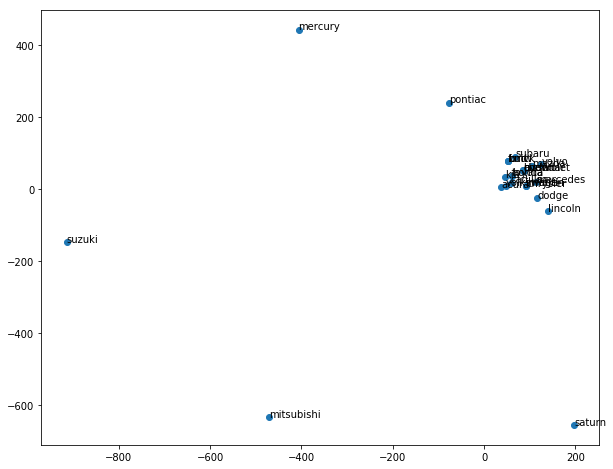

In [319]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]
label=df_lift.columns.values
plt.scatter(x, y)
for i in range(26):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()

## task C brand - attributes

In [65]:
import pandas as pd
import re
df_posts=pd.read_csv('posts.csv',encoding = 'cp1252')
s_post=df_posts['post']
s_post=s_post[s_post.notnull()]

brands = ['acura', 'audi', 'bmw', 'buick', 'cadillac',  'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes',
       'mercury', 'mitsubishi', 'nissan', 'pontiac',  'saturn', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo']

brand_model=pd.read_csv('brand_model.csv')
s_brand=brand_model['brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace('.','').replace(',','').replace('-',' '))
s_model=brand_model['model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace('?',''))

sub_super=pd.read_csv('sub_super.csv')
attribute_dict = dict(zip(sub_super.iloc[:,0], sub_super.iloc[:,1]))

In [46]:
import re
s_post_converted=s_post.map(lambda x:x.lower())

for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [279]:
def remove_pun(text):
    '''remove all those punctuations'''
    s=posts_nostp[352][44:46]
    pun=['.',',',';',':','\\','?','(',')','-','"','/',s,'\'s']
    for p in pun:
        text=text.replace(p,' ')
    for brand in brands:
        text=text.replace(brand,' '+brand+' ')
    return text

posts_nopun=s_post_converted.map(lambda x:remove_pun(str(x)))

In [280]:
from nltk.corpus import stopwords

def remove_stp(text):
    '''remove stopwords'''
    stp_removed = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return stp_removed

posts_nostp=posts_nopun.map(lambda x:remove_stp(x))

In [221]:
# first check if a brand in a text and import re
def find_idx(brand, text): 
    ''' find the indexs of a brand in a post;
        check if a brand in a post first,
        and need to import re'''
    total_count=len(re.findall(brand,text))
    token=text.split()
    idx_temp = token.index(brand)
    idx=idx_temp
    idx_list=[idx]
    count=1
    while idx<len(token) and count<total_count:
        idx_temp = token[idx+1:].index(brand)
        idx=idx+idx_temp+1
        idx_list.append(idx) 
        count+=1
    return idx_list

In [222]:
def features(brand,text):
    '''find feature list for a brand in a post'''
    idx_list=find_idx(brand,text)
    token=text.split()
    feature_list=[]
    for i in idx_list:
        feature_list=feature_list+token[max(0,i-5):i]+token[i+1:min(i+6,len(token))]
    return feature_list

In [223]:
def find_attr_unique(brand, text):
    '''find the unique general attribute in a post for a brand'''
    if brand in text:
        f=features(brand, text)
        attribute=pd.Series([attribute_dict.get(w) for w in f])
        attribute=attribute[attribute.notnull()]
        result=list(attribute.unique()) # should we take unique? or not
    else:
        result=[]
    return result

In [224]:
def find_attr_notunique(brand, text):
    '''find the unique general attribute in a post for a brand'''
    if brand in text:
        f=features(brand, text)
        attribute=pd.Series([attribute_dict.get(w) for w in f])
        attribute=attribute[attribute.notnull()]
        result=list(attribute) # should we take unique? or not
    else:
        result=[]
    return result

In [213]:
# find the top 5 most frequently mentioned attributes
def find_total_attr(text):
    '''find any atribute mentioned in a post'''
    attribute=pd.Series([attribute_dict.get(w) for w in text.split()])
    attribute=attribute[attribute.notnull()]
    return list(attribute)

total_attr=posts_nostp.map(lambda x:find_total_attr(x)).sum()
pd.Series(total_attr).value_counts()

sentiment      2653
build          1370
interior        539
function        495
issues          411
price           386
reliability     385
body            295
dtype: int64

In [282]:
# find the top 5 most frequently mentioned attributes associated with a brand
# top 5 brand: bmw, toyota, audi, honda, acura
top_brand=['bmw','toyota','audi','honda','acura']
attr_unique={}
attr_notunique={}
for brand in top_brand:
    attr_unique[brand]=posts_nostp.map(lambda x:find_attr_unique(brand,x))
    attr_notunique[brand]=posts_nostp.map(lambda x:find_attr_notunique(brand,x))

In [307]:
s_bmw=pd.Series(attr_unique['bmw'].sum()).value_counts()
s_toyota=pd.Series(attr_unique['toyota'].sum()).value_counts()
s_audi=pd.Series(attr_unique['audi'].sum()).value_counts()
s_honda=pd.Series(attr_unique['honda'].sum()).value_counts()
s_acura=pd.Series(attr_unique['bmw'].sum()).value_counts()
df_unique=pd.concat((s_bmw,s_toyota,s_audi,s_honda,s_acura),axis=1,sort=False)
df_unique.columns=top_brand

In [308]:
df_unique

,bmw,toyota,audi,honda,acura
sentiment,156,155,150,75,156
build,108,82,93,37,108
function,42,25,30,13,42
interior,28,37,24,17,28
price,24,23,21,14,24
issues,23,18,22,12,23
reliability,20,23,21,15,20
body,14,14,24,7,14


In [309]:
s2_bmw=pd.Series(attr_notunique['bmw'].sum()).value_counts()
s2_toyota=pd.Series(attr_notunique['toyota'].sum()).value_counts()
s2_audi=pd.Series(attr_notunique['audi'].sum()).value_counts()
s2_honda=pd.Series(attr_notunique['honda'].sum()).value_counts()
s2_acura=pd.Series(attr_notunique['bmw'].sum()).value_counts()
df_notunique=pd.concat((s2_bmw,s2_toyota,s2_audi,s2_honda,s2_acura),axis=1,sort=False)
df_notunique.columns=top_brand

In [310]:
df_notunique

,bmw,toyota,audi,honda,acura
sentiment,213,210,219,119,213
build,148,98,129,53,148
function,45,27,38,14,45
interior,31,41,31,22,31
price,29,28,23,16,29
issues,28,22,25,17,28
reliability,25,28,28,20,25
body,20,16,27,11,20
